# Problem Set 9
#### Serena Flint

### Problem 1

In [96]:
from IPython.display import Image
from qutip import *    # here is where we launch qutip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#returns expectation value 
def expectation(psi, j):
    if(j == 0): #first quibit
        t = tensor(sigmaz(), qeye(2), qeye(2))
        exp_t = expect(t, psi)
    if(j == 1): #second quibit
        t = tensor(qeye(2), sigmaz(), qeye(2))
        exp_t = expect(t, psi)
    if(j == 2): #third quibit
        t = tensor(qeye(2), qeye(2), sigmaz())
        exp_t = expect(t, psi)
    return exp_t
    
#returns probability that j quibit is spin up
def expect_j_up(psi, j):
    P0 = ket('0')*bra('0')
    if(j == 0): #first quibit
        prob = expect(tensor(P0, qeye(2), qeye(2)), psi)
    if( j == 1): #second quibit
        prob = expect(tensor(qeye(2), P0, qeye(2)), psi)
    if(j == 2): #third quibit
        prob = expect(tensor(qeye(2), qeye(2), P0), psi)
    
    #rounds-off numbers very close to 0 or 1
    if(abs(prob) < 1e-10):
        prob = 0
    if(abs(prob-1) < 1e-10):
        prob = 1
        
    return prob

psi = 1.0/np.sqrt(2.0)*(ket('000') + ket('010'))
print("Probability of second quibit having spin up: ", expect_j_up(psi, 1))
print("Expectation value of second quibit:          ", expectation(psi, 1))
        

Probability of second quibit having spin up:  0.4999999999999999
Expectation value of second quibit:           0.0


### Problem 2

In [97]:
#function given from assignment handout
def U_f(f_type):
    if (f_type=='0'): # f(x)=0
        return tensor(qeye(2),qeye(2)) # identity transformation, 
        # using a tensor product otherwise can't be combind easily with other operators
    if (f_type=='1'): # f(x)=1
        return tensor(qeye(2),sigmax()) # second qubit is flipped
    if (f_type=='x'): # f(x)=x
        return cnot(2,control=0,target=1) 
    if (f_type=='N'): # f(x)=NOT x
        return cnot(2,control=0,target=1)*tensor(qeye(2),sigmax())
    return tensor(qeye(2),qeye(2))  #return identity if not a known f_type

#calculates the output of simulating the circuit
def outpsi(op, op2, psi, f_type):
    out = op2*U_f(f_type)*op*psi
    return out

#two quibit version of previous method
#probability that first spin is up
def prob_up_outpsi(outpsi):
    P0 = ket('0')*bra('0')  # projection operator
    probability = expect(tensor(P0,qeye(2)),outpsi)
       
    #fixes rounding errors in matrix calculations
    if (abs(probability) < 1e-10):  # cuts off extremely small numbers
        probability = 0
    if (abs(probability-1) < 1e-10):  # cuts off extremely small numbers
        probability = 1
    return probability

#two quibit version of previous method
#probability that first spin is down
def prob_down_outpsi(outpsi):
    P0 = ket('1')*bra('1')  # projection operator
    probability = expect(tensor(P0,qeye(2)),outpsi)
       
    #fixes rounding errors in matrix calculations
    if (abs(probability) < 1e-10):  # cuts off extremely small numbers
        probability = 0
    if (abs(probability-1) < 1e-10):  # cuts off extremely small numbers
        probability = 1
    return probability

#returns expectation value for two quibut systems 
def expect_2q(psi, j):
    if(j == 0): #first quibit
        t = tensor(sigmaz(), qeye(2))
        exp_t = expect(t, psi)
    if(j == 1): #second quibit
        t = tensor(qeye(2), sigmaz())
        exp_t = expect(t, psi)

    return exp_t

psi = ket('01')
op = tensor(snot(), snot())
op2 = tensor(snot(), qeye(2))

out1 = outpsi(op, op2, psi, '0')
out2 = outpsi(op, op2, psi, '1')
out3 = outpsi(op, op2, psi, 'x')
out4 = outpsi(op, op2, psi, 'N')

#print(expect_2q(out1, 0))

print("Expected value with f(x)=0:", expect_2q(out1, 0))
print("Probability spin up:       ", prob_up_outpsi(out1))

print("\nExpected value with f(x)=1:", expect_2q(out2, 0))
print("Probability spin up:       ", prob_up_outpsi(out2))

print("\nExpected value with f(x)=x:", expect_2q(out3, 0))
print("Probability spin down:       ", prob_down_outpsi(out3))

print("\nExpected value with f(x)=NOTx:", expect_2q(out4, 0))
print("Probability spin down:       ", prob_down_outpsi(out4))

Expected value with f(x)=0: 0.9999999999999996
Probability spin up:        1

Expected value with f(x)=1: 0.9999999999999996
Probability spin up:        1

Expected value with f(x)=x: -0.9999999999999996
Probability spin down:        1

Expected value with f(x)=NOTx: -0.9999999999999996
Probability spin down:        1


### Problem 3

Is U_Minus unitary?: 1 

Is C unitary?: 1 

Quantum object: dims = [[2, 100], [1, 1]], shape = (200, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

Text(0.5, 0, 'Nth Step')

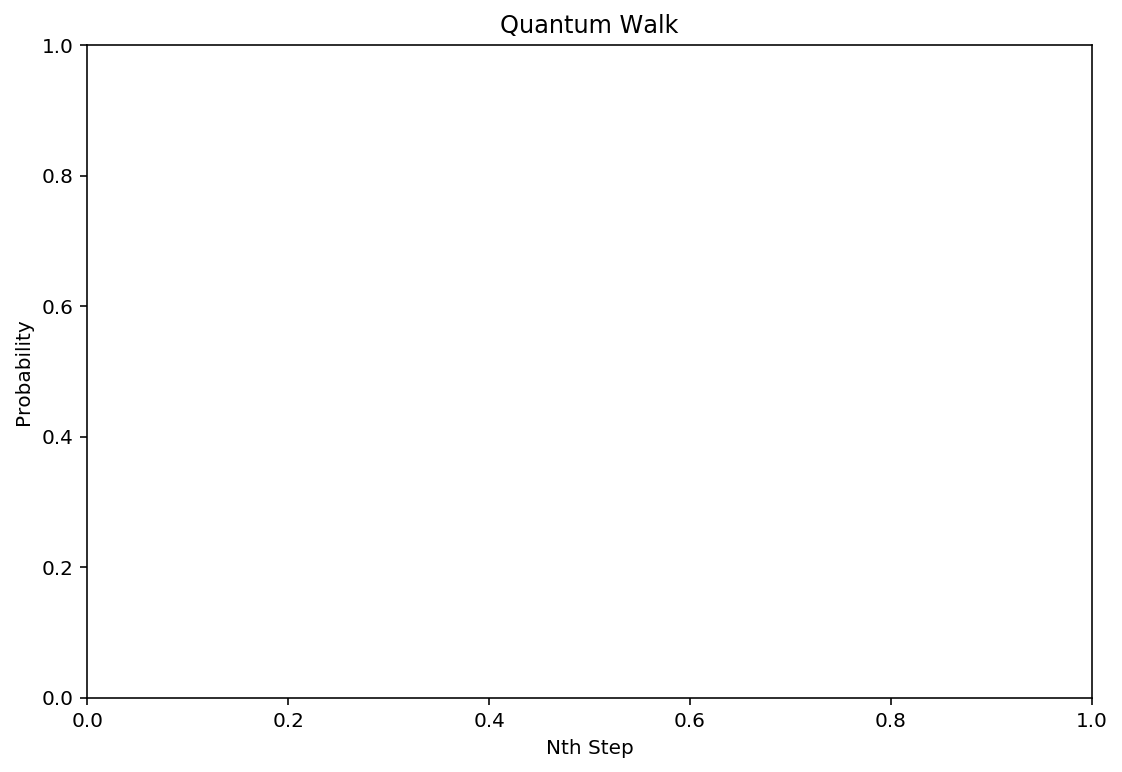

In [186]:
#return an operator that does |n> \to |n+1 mod N>
#code from assignment handout
def make_Uplus(N):
    U = projection(N,N-1,0)  # this gives a matrix with a single 1 in it
    for i in range(0,N-1):
        U = U + projection(N,i,i+1)
    #print(U)
    return U

#makes U-minus
def make_Uminus(N):
    U = projection(N,0,N-1)  # this gives a matrix with a single 1 in it
    
    for i in range(0,N-1):
        U = U + projection(N,i+1,i)
    #print(U)
    return U

def check_unitary(U):
    small = 1e-6
    if (U.type != 'oper'):
        return 0  # is not an operator
    z = U*U.dag()  # should be the identity matrix if unitary
    matrix = z.data   # should be the identity matrix if unitary
    #print(matrix)
    dim = U.shape[0]  # assumes is a square matrix
    # check every matrix value to make sure it looks like the identity matrix
    for i in range(0,dim):
        for j in range(0,dim):
            matrixvalue = matrix[i,j]
            if (i!=j):
                if (abs(matrixvalue) > small):  # has something other than 0 off diagonal
                    return 0  # is not unitary
            else:  # checking the diagonal entries
                if (abs(matrixvalue-1) > small):  # has something other than 1 on diagonal
                    return 0  # is not unitary
    # if you get to here z looks like the identity matrix and so U is unitary
    return 1 # is unitary!

#projection operator for problem 3
P0 = projection(2,0,0)  # this projects to |0>
#print(P0)

#projection for |1>
P1 = ket('1')*bra('1')
#print(P1)

print("Is U_Minus unitary?:", check_unitary(make_Uminus(5)), "\n")

N=100
HI = tensor(snot(), qeye(N)) #part c
C = tensor(P0, make_Uplus(N))+tensor(P1, make_Uminus(N)) #part d

print("Is C unitary?:", check_unitary(C), "\n")

V = HI*C #part e

def prob_N(N,psi):
    nprobs= np.zeros(N)  # allocate a vector of N values
    for i in range(0,N):
        nproj=projection(N,i,i)    # projection operator for state |i>
        v = tensor(qeye(2),nproj)  # to take into account both spin possible values
        nprobs[i] = expect(v,psi)  # probability of being in |n>
    return nprobs  # return the vector of probabilities


#print(psi)
#psi_y = (prob_N(N,psi0)) 

N_x = np.linspace(0, N-1, N, dtype=int)
#print(N_x)
def cont(psi0, N):
    prob_N
    return result

def qwalk(V, psi0, N):
    for i in range(0,N):
        vec = psi0*V
        arr.add(prob_N(i, vec))
        
    return arr

#print(qwalk(V, psi0, N))
psi0 = tensor(ket('0'),fock(N,0)) #part e 
psix = (ket('0')+ket('1')).unit()

def func(N, psi0):
    for i in range (0,N-1):
        if(i == 0):
            sum_psi = tensor(psi0, fock(N, i))
        else:
            psi_n = tensor(psi0, fock(N, i))
            sum_psi += psi_n
    return sum_psi.unit()

#print(func(N, psix))
print(psi0)
#print(prob_N(N, func(N, psi0)))
##print(V*psi0)
#print("TEST:", cont(psi0,N))
psi_y = prob_N(N,psi0)

plt.figure(figsize=(9,6))
#plt.plot(N_x, psi_y, 'b-')
plt.title("Quantum Walk")
plt.ylabel("Probability")
plt.xlabel("Nth Step")
